# Import 

In [1]:
import pandas as pd
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
from spacy_langdetect import LanguageDetector
import nltk  
import numpy as np  
import random  
import string
import matplotlib.pyplot as plt
import urllib.request  
import re  
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
#!pip install spacy-langdetect

In [ ]:
#!python -m spacy download en_core_web_lg

In [2]:
nlp = spacy.load('en')
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)

In [3]:
FILE="f_df.csv"

In [ ]:
#pd.read_csv("final_df.csv")

In [4]:
df = pd.read_csv(FILE, sep="," , index_col=['Unnamed: 0'])
s= pd.Series(df.lyrics)
s1=s.str.lower()
s1
df['paroles'] = s1
df
del df['lyrics']
#df1 = s1.to_frame()

In [5]:
df

,song,year,artist,genre,paroles
0,i-got-that,2007,eazy-e,Hip-Hop,...\n\ntimbo- when you hit me on my phone bett...
1,8-ball-remix,2007,eazy-e,Hip-Hop,"verse 1:\ni don't drink brass monkey, like to ..."
2,extra-special-thankz,2007,eazy-e,Hip-Hop,"19 muthaphukkin 93,\nand i'm back in this bitc..."
3,boyz-in-da-hood,2007,eazy-e,Hip-Hop,"hey yo man, remember that shit eazy did a whil..."
4,automoblie,2007,eazy-e,Hip-Hop,"yo, dre, man, i take this bitch out to the mov..."
...,...,...,...,...,...
231309,who-am-i-drinking-tonight,2012,edens-edge,Country,"i gotta say\nboy, after only just a couple of ..."
231310,liar,2012,edens-edge,Country,i helped you find her diamond ring\nyou made m...
231311,last-supper,2012,edens-edge,Country,look at the couple in the corner booth\nlooks ...
231312,christ-alone-live-in-studio,2012,edens-edge,Country,when i fly off this mortal earth\nand i'm meas...


# Sentiments Analysis By Lyrics

In [13]:
sid = SentimentIntensityAnalyzer()
counter = 0
max_ = len(df.index)

cols = {
    'song': [],
    'year': [],
    'artist': [],
    'genre': [],
    'lyrics': [],
    'pos': [],
    'neu': [],
    'neg': []
}
df1 = pd.DataFrame(cols)

# Pour chaque paroles dans le dataset
for index in df.index:
    lyrics = df.loc[index]["paroles"]

    # Score de positivité
    comp = sid.polarity_scores(lyrics)
    comp = comp['compound']

    # Récupération des valeurs initiales
    for col in df.columns:
        df1.loc[index, col] = df.loc[index][col]
    # Ajout des nouvelles valeurs
    df1.loc[index, "pos"] = int(comp >= 0.5)
    df1.loc[index, "neu"] = int(0.5 > comp >= -0.5)
    df1.loc[index, "neg"] = int(comp <-0.5)

    # Affichage de la progression
    print(f"{round(counter/max_*100,2)}%", end='\r')

    # Mise à jour du counter
    counter += 1

In [15]:
del df1['lyrics']

In [16]:
df1

,song,year,artist,genre,pos,neu,neg,paroles
0,i-got-that,2007.0,eazy-e,Hip-Hop,0.0,0.0,1.0,...\n\ntimbo- when you hit me on my phone bett...
1,8-ball-remix,2007.0,eazy-e,Hip-Hop,0.0,0.0,1.0,"verse 1:\ni don't drink brass monkey, like to ..."
2,extra-special-thankz,2007.0,eazy-e,Hip-Hop,1.0,0.0,0.0,"19 muthaphukkin 93,\nand i'm back in this bitc..."
3,boyz-in-da-hood,2007.0,eazy-e,Hip-Hop,0.0,0.0,1.0,"hey yo man, remember that shit eazy did a whil..."
4,automoblie,2007.0,eazy-e,Hip-Hop,0.0,0.0,1.0,"yo, dre, man, i take this bitch out to the mov..."
...,...,...,...,...,...,...,...,...
231309,who-am-i-drinking-tonight,2012.0,edens-edge,Country,1.0,0.0,0.0,"i gotta say\nboy, after only just a couple of ..."
231310,liar,2012.0,edens-edge,Country,0.0,0.0,1.0,i helped you find her diamond ring\nyou made m...
231311,last-supper,2012.0,edens-edge,Country,1.0,0.0,0.0,look at the couple in the corner booth\nlooks ...
231312,christ-alone-live-in-studio,2012.0,edens-edge,Country,1.0,0.0,0.0,when i fly off this mortal earth\nand i'm meas...


In [23]:
df1.to_excel("output.xlsx",engine='xlsxwriter')

In [22]:
#!pip install xlsxwriter

     |████████████████████████████████| 143kB 6.2MB/s eta 0:00:01


In [24]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


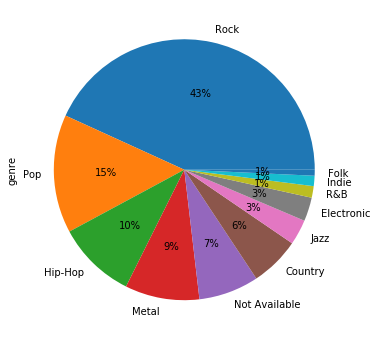

In [25]:
df1.genre.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
#df1.artist.value_counts().plot(kind='pie', autopct='%1.0f%%')